# Ejercicio 57

 <img src="img/57-crop.svg" alt="graph" width="100%" height="100%"> 

__Determinar:__
1. $\Delta S_u$
2. $\eta_{ex,proc}$
3. $\eta_{iso,turb}$ y $\eta_{ex,turb}$

-----------
## Solución

$$ Q_2 = m c_c (T_f - T_i) $$

In [1]:
# Datos:
m = 1600 # kg
cc = 3.7e3 # J/kg
Tf = 5 + 273.15 # K
Ti = 27 + 273.15 # K

Q2 =  m*cc*(Tf - Ti)
print('Q2 = %s kJ'%round(Q2/1000,2))

Q2 = -130240.0 kJ


$$ \Delta s_2 = \int_{Ti}^{Tf} \frac{\delta Q}{T} = \int_{Ti}^{Tf} c_c \, \frac{dt}{T} $$

$$ \quad \Delta s_2 = c_c \, (\ln T_f - \ln T_i) $$

$$ \Rightarrow \Delta S_2 = m c_c \ln \left( \frac{T_f}{T_i}  \right) $$

In [2]:
import math

In [3]:
DS2 = m*cc*math.log(Tf/Ti)
print('DS2 = %s kJ/kg'%round(DS2/1000,2))

DS2 = -450.64 kJ/kg


$$ Q_{U2} = Q_2 - T_0 \Delta S_2 $$

In [4]:
T0 = 300 # K

QU2 = Q2 - T0*DS2
print('QU2 = %s kJ'%round(QU2/1000,2))

QU2 = 4952.34 kJ


$$ \eta_{ex} = \frac{Q_{U2}}{W_{MF}} \quad \Rightarrow \quad W_{MF} = \frac{Q_{U2}}{\eta_{ex}} $$

In [5]:
eta_ex = 0.8

WMF = QU2/eta_ex
print('WMF = %s kJ'%round(WMF/1000,2))

WMF = 6190.43 kJ


### Turbina
$\left.
\begin{array}{l}
P_4 = 10 \, \mathrm{bar} \\
t_4 = 300^\circ \mathrm{C}
\end{array}
\right\} \quad \rightarrow \quad
\left[
\begin{array}{l}
h_4 \\
s_4
\end{array}
\right]$

In [6]:
import CoolProp.CoolProp as cp

In [7]:
P4 = 10e5 # Pa
T4 = 300 + 273.15 # K

h4 = cp.PropsSI('H','P',P4,'T',T4,'Water')
s4 = cp.PropsSI('S','P',P4,'T',T4,'Water')

print('h4 = %s kJ/kg'%round(h4/1000,2))
print('s4 = %s kJ/kg*K'%round(s4/1000,5))

h4 = 3051.63 kJ/kg
s4 = 7.12462 kJ/kg*K


$\left.
\begin{array}{l}
P_5 = 0,5 \, \mathrm{bar} \\
x_5 = 0,95
\end{array}
\right\} \quad \rightarrow \quad
\left[
\begin{array}{l}
h' \\
h''
\end{array}
\right]
\quad \rightarrow \quad
\left[
\begin{array}{l}
s' \\
s''
\end{array}
\right]
$

Entonces
$$ \begin{array}{l}
h_5 = x_5 (h'' - h') + h' \\
s_5 = x_5 (s'' - s') + s'
\end{array}$$

In [8]:
P5 = 0.5e5 # Pa
x5 = 0.95

hp1 = cp.PropsSI('H','P',P5,'Q',0,'Water') # Líquido saturado
hp2 = cp.PropsSI('H','P',P5,'Q',1,'Water') # Vapor saturado
sp1 = cp.PropsSI('S','P',P5,'Q',0,'Water') # Líquido saturado
sp2 = cp.PropsSI('S','P',P5,'Q',1,'Water') # Vapor saturado

print('hp1 = %s kJ/kg'%round(hp1/1000,2))
print('hp2 = %s kJ/kg'%round(hp2/1000,2))
print('sp1 = %s kJ/kg*K'%round(sp1/1000,5))
print('sp2 = %s kJ/kg*K'%round(sp2/1000,5))

hp1 = 340.54 kJ/kg
hp2 = 2645.22 kJ/kg
sp1 = 1.0912 kJ/kg*K
sp2 = 7.593 kJ/kg*K


In [9]:
h5 = x5*(hp2 - hp1) + hp1
s5 = x5*(sp2 - sp1) + sp1

print('h5 = %s kJ/kg'%round(h5/1000,2))
print('s5 = %s kJ/kg*K'%round(s5/1000,5))

h5 = 2529.98 kJ/kg
s5 = 7.26791 kJ/kg*K


In [10]:
T5 = cp.PropsSI('T','P',P5,'Q',x5,'Water')
print('T5 = %s K'%round(T5,2))
print('t5 = %s°C'%round(T5 - 273.15,2))

T5 = 354.47 K
t5 = 81.32°C


$$ W_{MF} = - W_T $$

$$ W_T = m_4 (h_5 - h_4) $$

$$ m_4 = \frac{- W_T}{h_5 - h_4} $$

In [11]:
WT = -WMF

m4 = WT/(h5 - h4)
print('m4 = %s kg/s'%round(m4,3))

m4 = 11.867 kg/s


### Intercambiador de calor
$\left.
\begin{array}{l}
P_3 = 10 \, \mathrm{bar} \\
t_3 = 200^\circ \mathrm{C}
\end{array}
\right\} \quad \rightarrow \quad
\left[
\begin{array}{l}
h_3 \\
s_3
\end{array}
\right]$

In [12]:
P3 = 10e5 # Pa
T3 = 200 + 273.15 # K

h3 = cp.PropsSI('H','P',P3,'T',T3,'Water')
s3 = cp.PropsSI('S','P',P3,'T',T3,'Water')

print('h3 = %s kJ/kg'%round(h3/1000,2))
print('s3 = %s kJ/kg*K'%round(s3/1000,5))

h3 = 2828.26 kJ/kg
s3 = 6.69554 kJ/kg*K


$$ \Delta H_{34} = m_3 ( h_4 - h_3 ) = -Q_F $$

$$ \Rightarrow \; Q_F = m_3 (h_3 - h_4) $$

In [13]:
m3 = m4

QF = m3*(h3 - h4)
print('QF = %s kJ'%round(QF/1000,2))

QF = -2650.7 kJ


$\left.
\begin{array}{l}
P_1 = P_2 = 10 \, \mathrm{bar} \\
t_1 = 270^\circ \mathrm{C}
\end{array}
\right\} \quad \rightarrow \quad
\left[
\begin{array}{l}
h_1 \\
s_1
\end{array}
\right]$

In [14]:
P2 = 10e5 # Pa
P1 = P2
P3 = P2
P4 = P2
T1 = 270 + 273.15 # K

h1 = cp.PropsSI('H','P',P1,'T',T1,'Water')
s1 = cp.PropsSI('S','P',P1,'T',T1,'Water')

print('h1 = %s kJ/kg'%round(h1/1000,2))
print('s1 = %s kJ/kg*K'%round(s1/1000,5))

h1 = 2986.94 kJ/kg
s1 = 7.00869 kJ/kg*K


$\left.
\begin{array}{l}
P_2 = 10 \, \mathrm{bar} \\
x_2 = 0,9
\end{array}
\right\} \quad \rightarrow \quad
\left[
\begin{array}{l}
h' \\
h''
\end{array}
\right]
\quad \rightarrow \quad
\left[
\begin{array}{l}
s' \\
s''
\end{array}
\right]
$

Entonces
$$ \begin{array}{l}
h_2 = x_2 (h'' - h') + h' \\
s_2 = x_2 (s'' - s') + s'
\end{array}$$

In [15]:
x2 = 0.9

hp1 = cp.PropsSI('H','P',P2,'Q',0,'Water') # Líquido saturado
hp2 = cp.PropsSI('H','P',P2,'Q',1,'Water') # Vapor saturado
sp1 = cp.PropsSI('S','P',P2,'Q',0,'Water') # Líquido saturado
sp2 = cp.PropsSI('S','P',P2,'Q',1,'Water') # Vapor saturado

print('hp1 = %s kJ/kg'%round(hp1/1000,2))
print('hp2 = %s kJ/kg'%round(hp2/1000,2))
print('sp1 = %s kJ/kg*K'%round(sp1/1000,5))
print('sp2 = %s kJ/kg*K'%round(sp2/1000,5))

hp1 = 762.52 kJ/kg
hp2 = 2777.11 kJ/kg
sp1 = 2.13806 kJ/kg*K
sp2 = 6.58502 kJ/kg*K


In [16]:
h2 = x2*(hp2 - hp1) + hp1
s2 = x2*(sp2 - sp1) + sp1

print('h2 = %s kJ/kg'%round(h2/1000,2))
print('s2 = %s kJ/kg*K'%round(s2/1000,5))

h2 = 2986.94 kJ/kg
s2 = 7.00869 kJ/kg*K


$\left\{
\begin{array}{l}
m_3 = m_4 \\
m_1 + m_2 = m_3 \\
m_1 h_1 + m_2 h_2 = m_3 h_3
\end{array}
\right.
$

In [17]:
import sympy as sy

In [18]:
m1 , m2 = sy.symbols('m1 m2')

Eq1 = sy.Eq( m1 + m2 , m3 )
Eq2 = sy.Eq( m1*h1 + m2*h2 , m3*h3 )

Sol = sy.solve( [Eq1,Eq2],[m1,m2] )
print(Sol)

{m1: 7.28869497509010, m2: 4.57829486322370}


In [19]:
m1 = Sol.get(m1)
m2 = Sol.get(m2)

print('m1 = %s kg/s'%round(m1,3))
print('m2 = %s kg/s'%round(m2,3))

m1 = 7.289 kg/s
m2 = 4.578 kg/s


### Rendimiento isoentrópico de la turbina
$$ \eta_{iso} = \frac{h_4 - h_5}{h_4 - h_{5rev}} $$

$\left.
\begin{array}{l}
P_5 = 0,5 \, \mathrm{bar} \\
s_{5rev} = s_4
\end{array}
\right\} \quad \rightarrow \quad
\left[
\begin{array}{l}
s' \\
s''
\end{array}
\right]
,
\left[
\begin{array}{l}
h' \\
h''
\end{array}
\right]$

$$ x_{5rev} = \frac{s_{5rev} - s'}{s'' - s'} $$

In [20]:
P5 = 0.5e5 # Pa
s5rev = s4 # J/kg*K

sp1 = cp.PropsSI('S','P',P5,'Q',0,'Water')
sp2 = cp.PropsSI('S','P',P5,'Q',1,'Water')

print('sp1 = %s kJ/kg*K'%round(sp1/1000,5))
print('sp2 = %s kJ/kg*K'%round(sp2/1000,5))

sp1 = 1.0912 kJ/kg*K
sp2 = 7.593 kJ/kg*K


In [21]:
x5rev = (s5rev - sp1)/(sp2 - sp1)
print('x5rev = %s'%round(x5rev,5))

x5rev = 0.92796


In [22]:
hp1 = cp.PropsSI('H','P',P5,'Q',0,'Water')
hp2 = cp.PropsSI('H','P',P5,'Q',1,'Water')

print('hp1 = %s kJ/kg'%round(hp1/1000,2))
print('hp2 = %s kJ/kg'%round(hp2/1000,2))

hp1 = 340.54 kJ/kg
hp2 = 2645.22 kJ/kg


$$ h_{5rev} = x_{5rev} (h'' - h') + h' $$

In [23]:
h5rev = x5rev*(hp2 - hp1) + hp1

print('h5rev = %s kJ/kg'%round(h5rev/1000,2))

h5rev = 2479.19 kJ/kg


### Rendimiento exergético de la turbina
$$ \eta_{ex,turb} = \frac{W_T}{m_4[ (h_5 - h_4) - T_0 (s_5 - s_4) ]} $$

In [24]:
eta_ex_turb = WT/( m4*( (h5 - h4) - T0*( s5 - s4 ) ))
print('eta_ex_turb = %s'%round(eta_ex_turb,4))

eta_ex_turb = 0.9239


### Variaciones de entropía

$$ W_{MF} = Q_1 + Q_2 $$

$$ Q_1 = W_{MF} - Q_2 $$

In [25]:
Q1 = WMF - Q2
print('Q1 = %s kJ'%round(Q1/1000,2))

Q1 = 136430.43 kJ


$$ \Delta S_1 = \frac{Q_1}{T_0} $$

In [26]:
DS1 = Q1/T0
print('DS1 = %s kJ/K'%round(DS1/1000,4))

DS1 = 454.7681 kJ/K


$$ \Delta S_F = \frac{Q_F}{T_F} $$

In [27]:
TF = 700 # K

DSF = QF/TF
print('DSF = %s kJ/K'%round(DSF/1000,3))

DSF = -3.787 kJ/K


$$ \begin{array}{l}
\Delta S_{15} = m_1 (s_5 - s_1) \\
\Delta S_{25} = m_2 (s_5 - s_2)
\end{array}$$

In [28]:
DS15 = m1*(s5 - s1)
DS25 = m2*(s5 - s2)

print('DS15 = %s kJ/K'%round(DS15/1000,4))
print('DS25 = %s kJ/K'%round(DS25/1000,4))

DS15 = 1.8894 kJ/K
DS25 = 5.1624 kJ/K


$$ \Delta S_u = \Delta S_{15} + \Delta S_{25} + \Delta S_F + \Delta S_2 + \Delta S_1 $$

In [29]:
DSu = DS15 + DS25 + DSF + DS2 + DS1 
print('DSu = %s kJ/K'%round(DSu/1000,4))

DSu = 7.3921 kJ/K


### Rendimiento isoentrópico de la turbina
$$ \eta_{iso} = \frac{h_4 - h_5}{h_4 - h_{5rev}} $$

In [30]:
eta_iso = (h4 - h5)/(h4 - h5rev)
print('eta_iso = %s'%round(eta_iso,3))

eta_iso = 0.911


### Variaciones de exergía

$\begin{array}{l}
\Delta Ex_{14} = m_1 (h_4 - h_1) - m_1 T_0 (s_4 - s_1) \\
\Delta Ex_{24} = m_2 (h_4 - h_2) - m_2 T_0 (s_4 - s_2) \\
\Delta Ex_{45} = m_4 (h_5 - h_4) - m_4 T_0 (s_5 - s_4)
\end{array}$

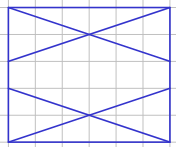

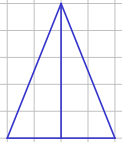

In [31]:
DEx14 = m1*(h4 - h1) - m1*T0*(s4 - s1)
DEx24 = m2*(h4 - h2) - m2*T0*(s4 - s2)
DEx45 = m4*(h5 - h4) - m4*T0*(s5 - s4)

### Rendimiento exergético del proceso

$$ \eta_{ex,proc} = \frac{\Delta Ex_{14} + \Delta Ex_{24} + Q_{U2} }{ |\Delta Ex_{45} + Q_F| } $$

In [35]:
eta_ex_pro = (DEx14 + DEx24 + QU2)/abs(DEx45 + QF)
print('eta_ex_pro = %s'%round(eta_ex_pro,3))

eta_ex_pro = 0.641


In [33]:
%reset -s -f